In [1]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [35]:
data = pd.read_csv('C:/Users/ssssa/Desktop/Project/imdb/movie.csv')

In [89]:
strings_list=[]
for colname, colvalue in data.iteritems():
    if type(colvalue[0])==str:
        strings_list.append(colname)
strings_list

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

In [90]:
numbr = data.columns.difference(strings_list)  
total_num= data[numbr]
numbr


Index([u'actor_1_facebook_likes', u'actor_2_facebook_likes',
       u'actor_3_facebook_likes', u'aspect_ratio', u'budget',
       u'cast_total_facebook_likes', u'director_facebook_likes', u'duration',
       u'facenumber_in_poster', u'gross', u'imdb_score',
       u'movie_facebook_likes', u'num_critic_for_reviews',
       u'num_user_for_reviews', u'num_voted_users', u'title_year'],
      dtype='object')

In [91]:
total_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,7.1,0,NaN,NaN,8,NaN


In [92]:
#fill in NA with O
total_num= total_num.fillna(value=0,axis=1)

In [99]:
# Standardize the datset
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(total_num)

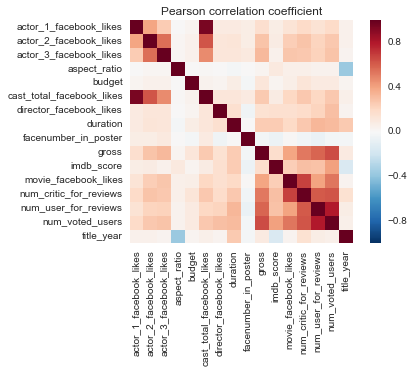

In [109]:
plt.title('Pearson correlation coefficient')
sns.heatmap(total_num.corr(),vmax=1, square=True)


In [182]:
# Find the eigen value and vector
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vecs,eig_vals = np.linalg.eig(cov_mat)

In [183]:
eig_vecs

array([  4.48895421e+00,   2.06396821e+00,   1.47239049e+00,
         1.06549612e+00,   1.64485837e-03,   9.96934303e-01,
         9.55976134e-01,   8.95830522e-01,   8.21093952e-01,
         1.47584860e-01,   7.69675198e-01,   4.82895038e-01,
         4.22790205e-01,   4.04205619e-01,   2.78960462e-01,
         7.34773161e-01])

In [184]:
#Create a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eig_vecs[i]),eig_vals[:,i]) for i in range(len(eig_vals))]
#eig_vecs

In [185]:
#eig_pairs_sort=sorted(eigen_pairs, reverse=True) 
eig_pairs_sort1= eigen_pairs.sort(key=lambda x:x[0], reverse=True )
print eig_pairs_sort1

None


In [186]:
tot = sum(eig_vecs)
var_exp = [(i/tot)*100 for i in sorted(eig_vecs, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

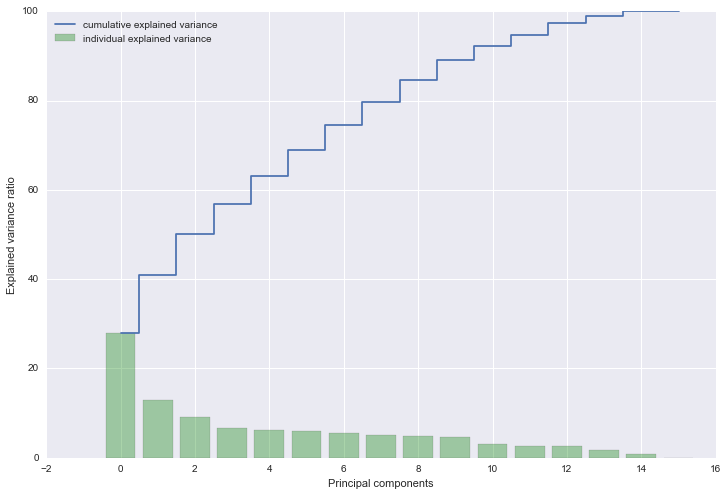

In [188]:
plt.figure(figsize=(12, 8))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Approximately 90% of the variance can be explained with the 9 principal components. 
Now we wil implement PCA with 9 components. 

# Implement PCA with 9 components

In [190]:
PCA_sk = PCA(n_components=9)
PCA_sk_new = PCA_sk.fit_transform(X_std)
PCA_sk_new

array([[  1.14073884e+01,  -6.91513891e+00,   1.11131969e+00, ...,
          1.93648327e+00,  -1.13512169e-01,  -3.92786485e+00],
       [  5.84453502e+00,  -1.41652968e-01,   5.58065815e-01, ...,
          1.36588519e+00,  -5.53069861e-01,  -2.16813258e+00],
       [  5.04957804e+00,  -2.80163114e+00,   3.39982152e-01, ...,
          1.66038520e+00,   7.18380520e-01,  -7.09650434e-02],
       ..., 
       [ -1.99445061e+00,   8.46780454e-02,   7.77321449e-01, ...,
         -2.33715452e-01,   5.80377595e-01,   9.79597115e-01],
       [ -1.55837960e+00,   5.39136509e-01,  -6.44299832e-02, ...,
         -5.11599471e-03,   1.94445508e-01,  -1.58566789e-02],
       [ -1.61100208e+00,  -2.03339262e-01,   5.10296243e-02, ...,
         -6.26264320e-02,  -8.02216394e-02,   4.00488894e-01]])

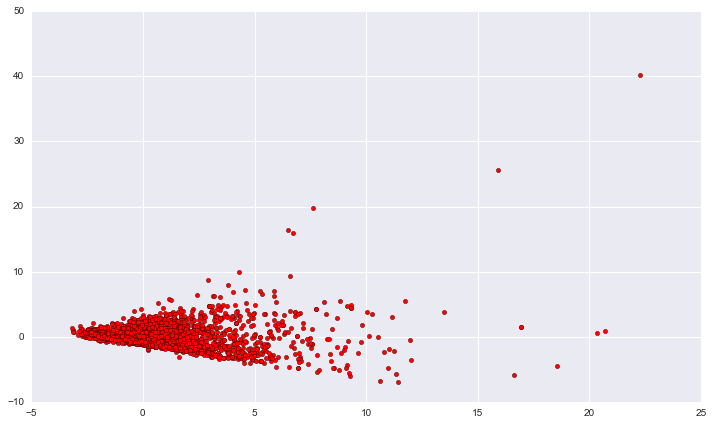

In [194]:
#first 2 projection components as a 2D scatter plot
plt.figure(figsize = (12,7))
plt.scatter(PCA_sk_new[:,0],PCA_sk_new[:,1], c='red')
#plt.ylim(-10,30)
plt.show()

# VISUALISATION WITH KMEANS CLUSTERING


In [198]:
kmeans = KMeans(n_clusters=3)
clustered_d = kmeans.fit_predict(PCA_sk_new)


In [205]:
colormap= {0: 'red', 1: 'blue', 2:'green'}
colorline= [colormap[i] for i in clustered_d]


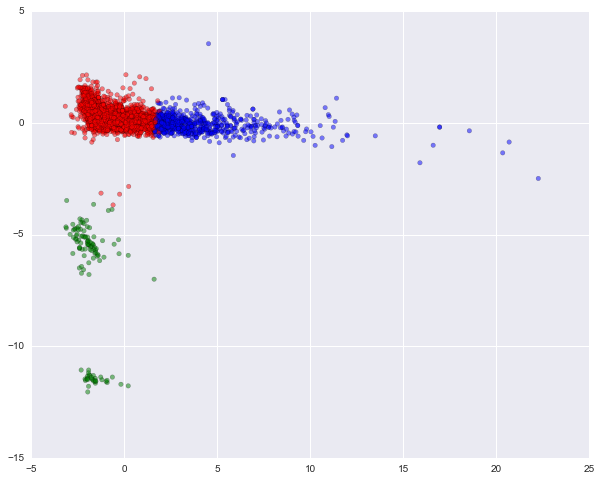

In [206]:
plt.figure(figsize = (10,8))
plt.scatter(PCA_sk_new[:,0],PCA_sk_new[:,2], c= colorline, alpha=0.5) 
plt.show()

In [208]:
df = pd.DataFrame(PCA_sk_new)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['clustered_d'] = clustered_d

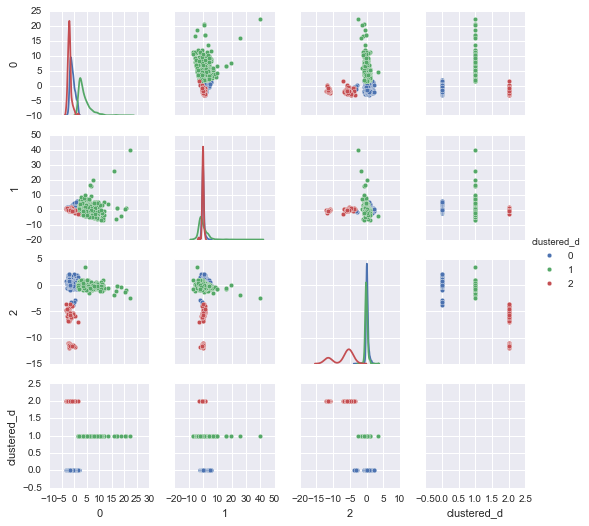

In [210]:
sns.pairplot(df, hue='clustered_d',diag_kind='kde',size=1.85)

(-2, 2)

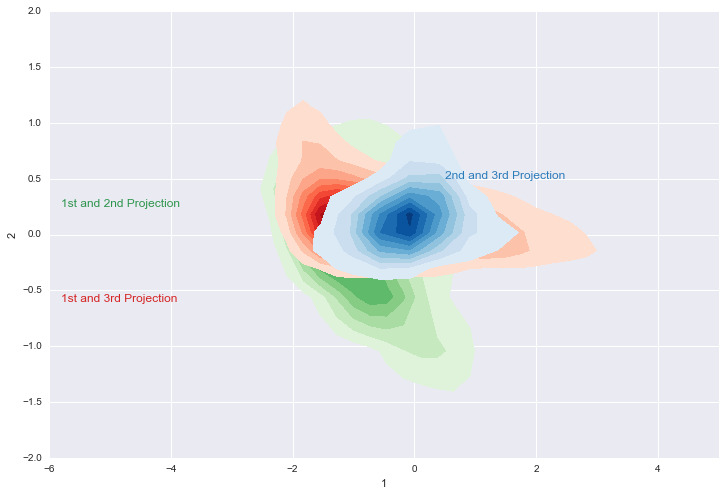

In [212]:
sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(12, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(df[0], df[1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(df[0], df[2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(df[1], df[2], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-5.8, -0.6, "1st and 3rd Projection", size=12, color=red)
ax.text(-5.8, 0.25, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)